# Detectron2: Detect objects from webcam videostream
<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

## Inference with pre-trained model

In [0]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

In [0]:
# Create config
cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

Config './detectron2_repo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [0]:
# Create predictor
predictor = DefaultPredictor(cfg)

model_final_f6e8b1.pkl: 243MB [00:04, 51.1MB/s]                           


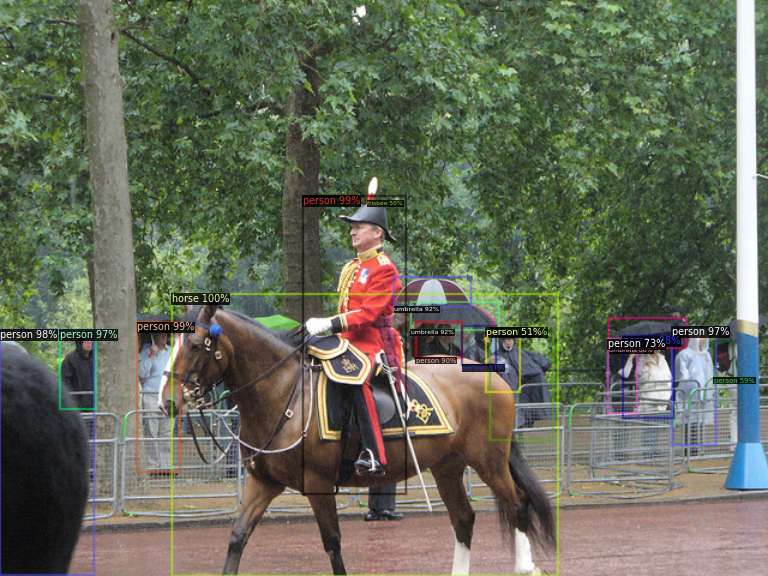

In [0]:
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret, image = cap.read()
    
    outputs = predictor(image)

    v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2.imshow('object_detection', v.get_image()[:, :, ::-1])
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break